In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/ketak/Desktop/Springboard/capstone ideas/NYSDOH_sample.csv')

In [3]:
df.shape

(236755, 36)

In [4]:
missing_values_count = df.isnull().sum()


In [5]:
missing_values_count[:]


Unnamed: 0                                    0
Hospital Service Area                       602
Hospital County                             602
Operating Certificate Number                602
Permanent Facility Id                       602
Facility Name                                 0
Age Group                                     0
Zip Code - 3 digits                        3726
Gender                                        0
Race                                          0
Ethnicity                                     0
Length of Stay                                0
Type of Admission                             0
Patient Disposition                           0
Discharge Year                                0
CCS Diagnosis Code                            0
CCS Diagnosis Description                     0
CCS Procedure Code                            0
CCS Procedure Description                     0
APR DRG Code                                  0
APR DRG Description                     

In [6]:
import numpy as np
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
percent_missing=(total_missing/total_cells) * 100
print(percent_missing)

2.972681557822315


In [7]:
newdf = df.drop(['Operating Certificate Number','Hospital Service Area','Hospital County','Permanent Facility Id','Zip Code - 3 digits','Payment Typology 2','Payment Typology 3'], axis=1)

In [8]:
print(df.dtypes)

Unnamed: 0                                 int64
Hospital Service Area                     object
Hospital County                           object
Operating Certificate Number             float64
Permanent Facility Id                    float64
Facility Name                             object
Age Group                                 object
Zip Code - 3 digits                       object
Gender                                    object
Race                                      object
Ethnicity                                 object
Length of Stay                            object
Type of Admission                         object
Patient Disposition                       object
Discharge Year                             int64
CCS Diagnosis Code                         int64
CCS Diagnosis Description                 object
CCS Procedure Code                         int64
CCS Procedure Description                 object
APR DRG Code                               int64
APR DRG Description 

In [9]:
# converting length of stay into a float raised an error due to the 120+ value

In [10]:
# replace 120+ length of stay with 120, which will be considered the maximum length of stay category
df.loc[df['Length of Stay']=='120 +','Length of Stay']='120'

In [11]:
# reattempt changing length of stay in to a float
df['Length of Stay']=df['Length of Stay'].astype(float)

In [12]:
# Looking at missing values, zip code Zip Code - 3 digits Type is Char. Length is 3. The first three digits of the patient's
#zip code. Blank for:- population size less than 20,000- abortion records, or- cell size less than 10 on population,classification strata. 
#“OOS” are Out of State zipcodes


In [13]:
df['Zip Code - 3 digits'].unique()

array(['142', '147', '140', '141', 'OOS', nan, '143', '148', '146', '145',
       '144', '122', '130', '128', '131', '137', '134', '133', '136',
       '149', '120', '135', '138', '112', '121', '139', '123', '124',
       '111', '129', '125', '117', '132', '127', '104', '109', '100',
       '126', '115', '103', '119', '105', '107', '113', '106', '116',
       '114', '108', '110', '101', '118'], dtype=object)

In [14]:
# the missing nan zip codes will be replaced with string '0'
df['Zip Code - 3 digits']=df['Zip Code - 3 digits'].fillna(0).astype(str)

In [15]:
# recheck zip codes to see if all null values are replced
df['Zip Code - 3 digits'].unique()

array(['142', '147', '140', '141', 'OOS', '0', '143', '148', '146', '145',
       '144', '122', '130', '128', '131', '137', '134', '133', '136',
       '149', '120', '135', '138', '112', '121', '139', '123', '124',
       '111', '129', '125', '117', '132', '127', '104', '109', '100',
       '126', '115', '103', '119', '105', '107', '113', '106', '116',
       '114', '108', '110', '101', '118'], dtype=object)

In [16]:
# asess different payment typologies 2
df['Payment Typology 2'].unique()

array(['Self-Pay', nan, 'Medicare', 'Medicaid',
       'Private Health Insurance', 'Blue Cross/Blue Shield',
       'Federal/State/Local/VA', 'Miscellaneous/Other',
       'Department of Corrections', 'Managed Care, Unspecified',
       'Unknown'], dtype=object)

In [17]:
# replace nan with 'Unknown'
df['Payment Typology 2']=df['Payment Typology 2'].fillna('Unknown')

In [18]:
# reasess different payment typologies 2
df['Payment Typology 2'].unique()

array(['Self-Pay', 'Unknown', 'Medicare', 'Medicaid',
       'Private Health Insurance', 'Blue Cross/Blue Shield',
       'Federal/State/Local/VA', 'Miscellaneous/Other',
       'Department of Corrections', 'Managed Care, Unspecified'],
      dtype=object)

In [19]:
# asess different payment typologies 3
df['Payment Typology 3'].unique()

array([nan, 'Self-Pay', 'Medicaid', 'Private Health Insurance',
       'Blue Cross/Blue Shield', 'Federal/State/Local/VA', 'Medicare',
       'Miscellaneous/Other', 'Managed Care, Unspecified',
       'Department of Corrections', 'Unknown'], dtype=object)

In [20]:
# replace nan with 'Unknown'
df['Payment Typology 3']=df['Payment Typology 3'].fillna('Unknown')

In [21]:
# reasess different payment typologies 3
df['Payment Typology 3'].unique()

array(['Unknown', 'Self-Pay', 'Medicaid', 'Private Health Insurance',
       'Blue Cross/Blue Shield', 'Federal/State/Local/VA', 'Medicare',
       'Miscellaneous/Other', 'Managed Care, Unspecified',
       'Department of Corrections'], dtype=object)

In [22]:
#Hospital Service Area                       
#Hospital County                             
#Operating Certificate Number               
#Permanent Facility Id  are blank for abortion records, these rows will be dropped.
#'APR Severity of Illness Description',APR Risk of Mortality', missing 6 values, will be dropped

In [23]:
df.dropna(inplace=True)

In [24]:
mvc=df.isnull().sum()
mvc[:]


Unnamed: 0                               0
Hospital Service Area                    0
Hospital County                          0
Operating Certificate Number             0
Permanent Facility Id                    0
Facility Name                            0
Age Group                                0
Zip Code - 3 digits                      0
Gender                                   0
Race                                     0
Ethnicity                                0
Length of Stay                           0
Type of Admission                        0
Patient Disposition                      0
Discharge Year                           0
CCS Diagnosis Code                       0
CCS Diagnosis Description                0
CCS Procedure Code                       0
CCS Procedure Description                0
APR DRG Code                             0
APR DRG Description                      0
APR MDC Code                             0
APR MDC Description                      0
APR Severit

In [25]:
df.shape

(236147, 36)

In [26]:
df.columns = df.columns.str.replace(' ', '_')

In [27]:
df.columns = df.columns.str.replace('-', '')

In [28]:
print(df.columns)

Index(['Unnamed:_0', 'Hospital_Service_Area', 'Hospital_County',
       'Operating_Certificate_Number', 'Permanent_Facility_Id',
       'Facility_Name', 'Age_Group', 'Zip_Code__3_digits', 'Gender', 'Race',
       'Ethnicity', 'Length_of_Stay', 'Type_of_Admission',
       'Patient_Disposition', 'Discharge_Year', 'CCS_Diagnosis_Code',
       'CCS_Diagnosis_Description', 'CCS_Procedure_Code',
       'CCS_Procedure_Description', 'APR_DRG_Code', 'APR_DRG_Description',
       'APR_MDC_Code', 'APR_MDC_Description', 'APR_Severity_of_Illness_Code',
       'APR_Severity_of_Illness_Description', 'APR_Risk_of_Mortality',
       'APR_Medical_Surgical_Description', 'Payment_Typology_1',
       'Payment_Typology_2', 'Payment_Typology_3', 'Birth_Weight',
       'Abortion_Edit_Indicator', 'Emergency_Department_Indicator',
       'Total_Charges', 'Total_Costs',
       'Ratio_of_Total_Costs_to_Total_Charges'],
      dtype='object')


In [29]:
import matplotlib.pyplot as plt

In [30]:
df.Length_of_Stay.mean()

5.503042596348885

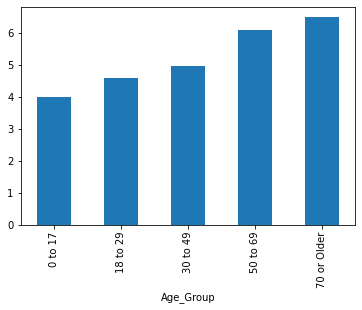

In [31]:
df.groupby('Age_Group').Length_of_Stay.mean().plot(kind='bar')
plt.show()


In [32]:
clist=list(df.columns)

In [33]:
clist.remove('Length_of_Stay')

In [34]:
clist.remove('Unnamed:_0')

In [35]:
# make a list of column names of relevant categorical variables, by removing numeric varables and unwanted categorical varaiables
unwanted_ele=['Total_Charges', 'Total_Costs', 'Ratio_of_Total_Costs_to_Total_Charges','Discharge_Year','Abortion_Edit_Indicator']

In [36]:
clist = [ele for ele in clist if ele not in unwanted_ele]

In [37]:
print(clist)

['Hospital_Service_Area', 'Hospital_County', 'Operating_Certificate_Number', 'Permanent_Facility_Id', 'Facility_Name', 'Age_Group', 'Zip_Code__3_digits', 'Gender', 'Race', 'Ethnicity', 'Type_of_Admission', 'Patient_Disposition', 'CCS_Diagnosis_Code', 'CCS_Diagnosis_Description', 'CCS_Procedure_Code', 'CCS_Procedure_Description', 'APR_DRG_Code', 'APR_DRG_Description', 'APR_MDC_Code', 'APR_MDC_Description', 'APR_Severity_of_Illness_Code', 'APR_Severity_of_Illness_Description', 'APR_Risk_of_Mortality', 'APR_Medical_Surgical_Description', 'Payment_Typology_1', 'Payment_Typology_2', 'Payment_Typology_3', 'Birth_Weight', 'Emergency_Department_Indicator']


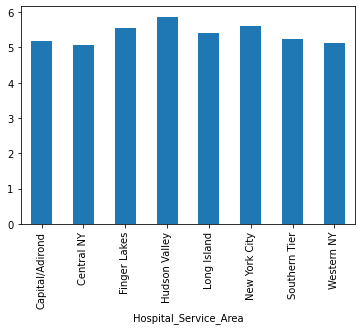

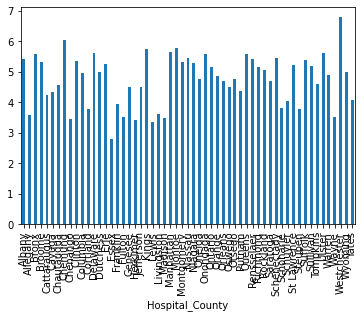

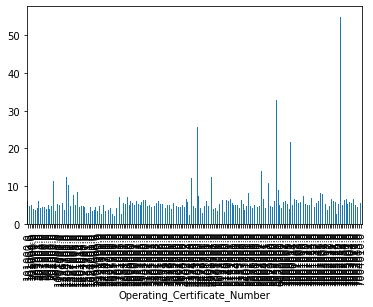

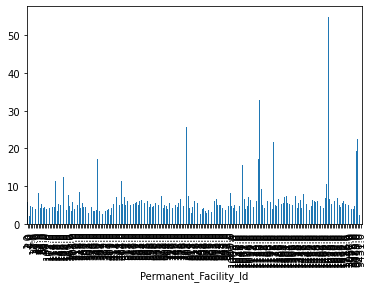

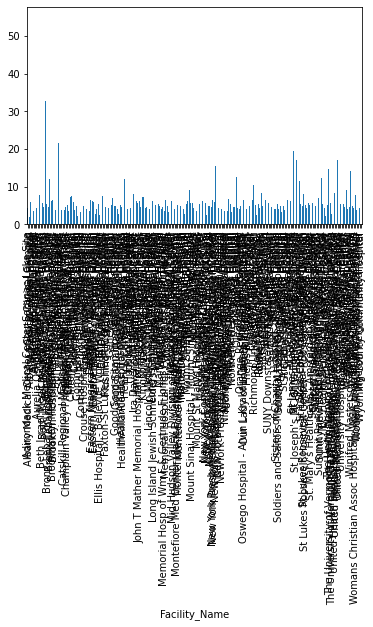

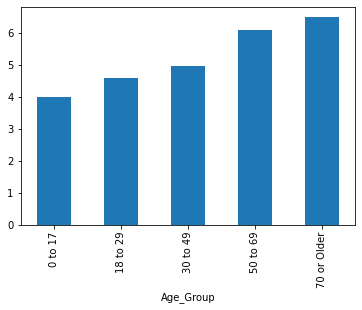

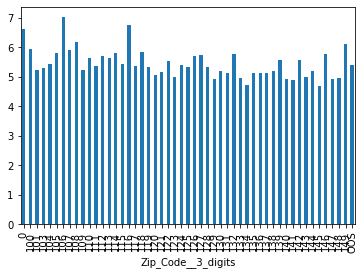

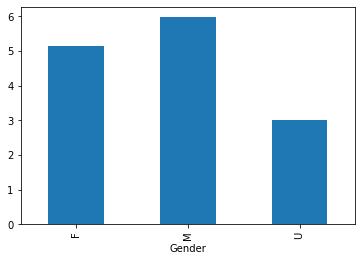

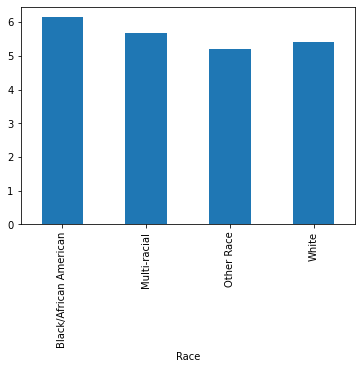

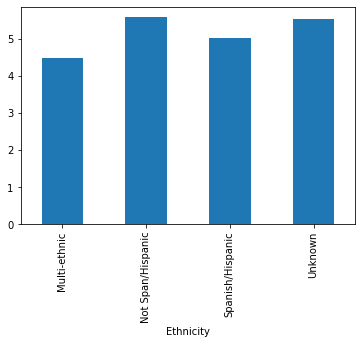

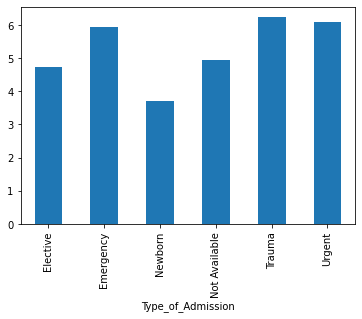

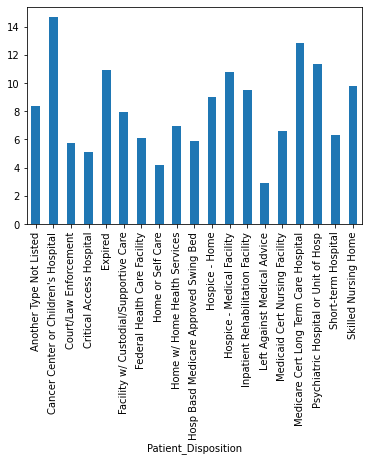

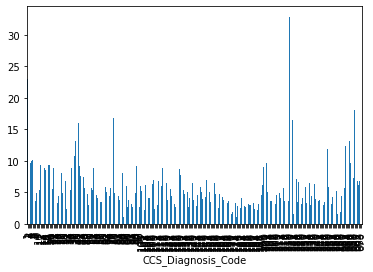

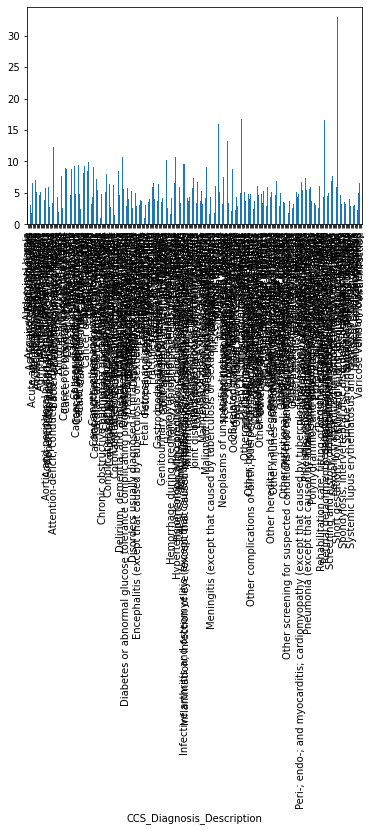

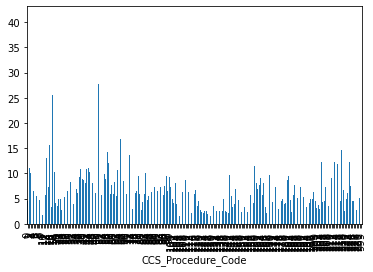

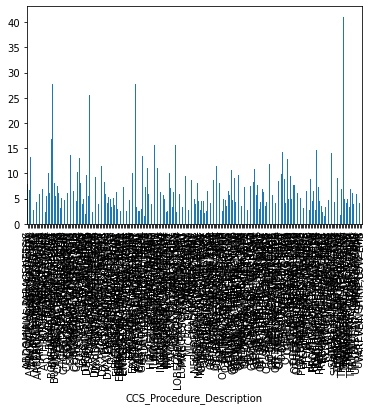

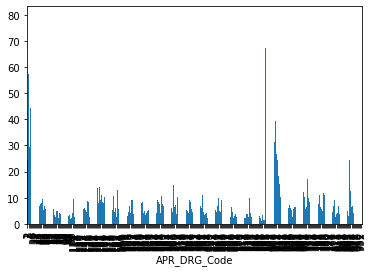

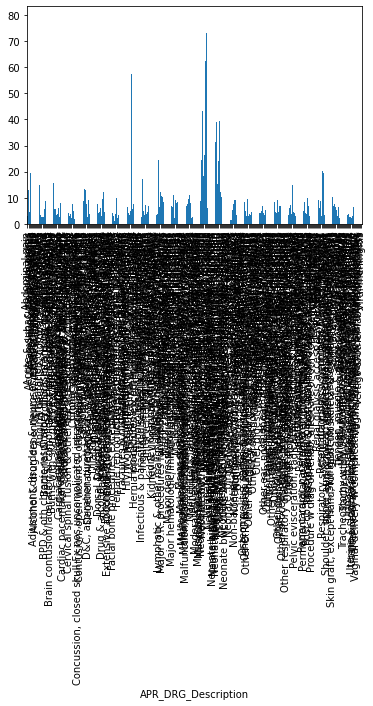

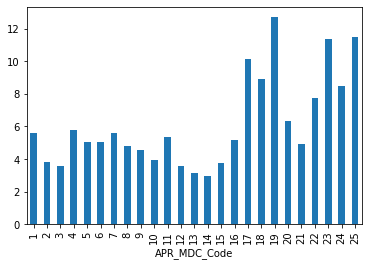

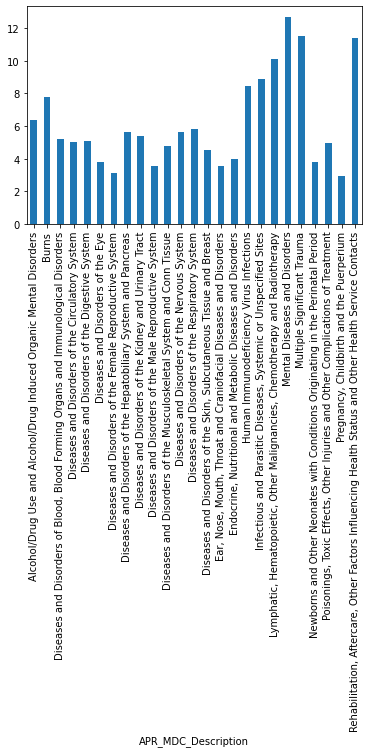

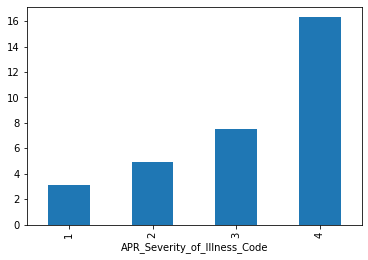

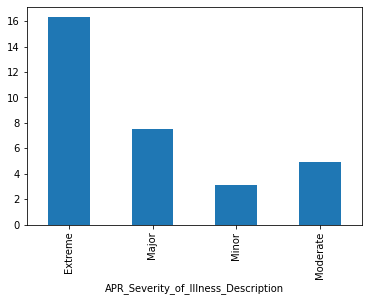

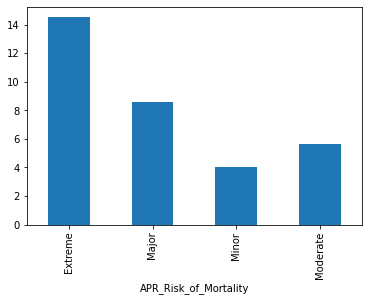

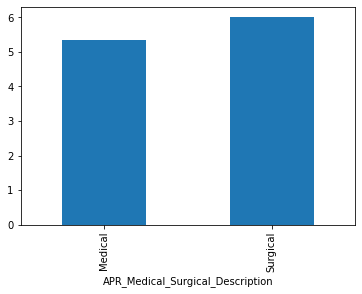

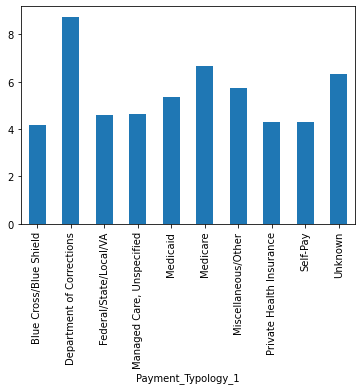

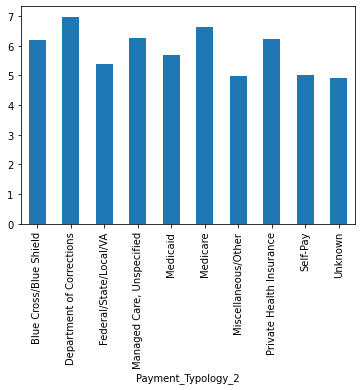

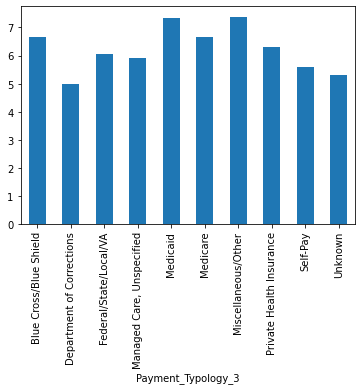

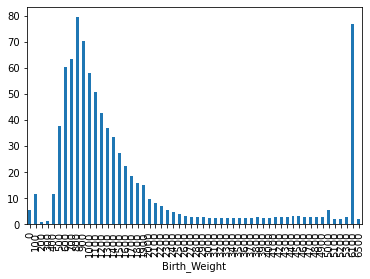

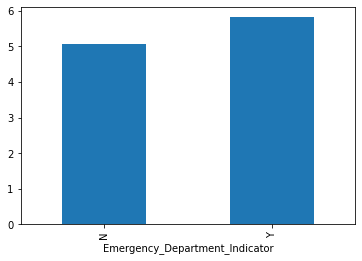

In [38]:
#plot categorical variables against length_of_stay
for x in clist:
    df.groupby(x).Length_of_Stay.mean().plot(kind='bar')
    plt.show()